In Multiclass classification, the instances can be classified into one of three or more classes. Here, the Dataset contains image data of Natural Scenes around the world that are distributed into 6 different categories. {'buildings' -> 0, 'forest' -> 1, 'glacier' -> 2, 'mountain' -> 3, 'sea' -> 4, 'street' -> 5 }

There are 14034 images in Train data and 3000 images in Test data.

## Import Libraries

In [9]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [10]:
print('Tensorflow Version: ',tensorflow.__version__)

Tensorflow Version:  2.3.1


## CNN-2D Model

In [11]:
# ImageDataGenerator generate batches of tensor image data with real-time data augmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/seg_train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('dataset/seg_test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode='binary')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [12]:
training_set.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [13]:
# Initialising the CNN
model = Sequential()

# Convolution
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Flattening
model.add(Flatten())

# Full connection
model.add(Dense(units = 256, activation = 'relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

model.add(Dense(units = 128, activation = 'relu'))

model.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 26912)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6889728   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

In [15]:
# Fitting the model
classifier = model.fit_generator(training_set,
                         steps_per_epoch = 250,
                         epochs = 40,
                         validation_data = test_set,    
                         validation_steps = 50,
                         callbacks=[early_stop])

Epoch 1/40
250/250 [==============================] - 54s 215ms/step - loss: 1.2227 - accuracy: 0.5153 - val_loss: 1.0285 - val_accuracy: 0.6100
Epoch 2/40
250/250 [==============================] - 53s 212ms/step - loss: 0.9750 - accuracy: 0.6276 - val_loss: 0.8577 - val_accuracy: 0.6669
Epoch 3/40
250/250 [==============================] - 52s 209ms/step - loss: 0.8843 - accuracy: 0.6672 - val_loss: 0.9797 - val_accuracy: 0.6681
Epoch 4/40
250/250 [==============================] - 51s 206ms/step - loss: 0.8163 - accuracy: 0.7017 - val_loss: 0.7276 - val_accuracy: 0.7419
Epoch 5/40
250/250 [==============================] - 51s 204ms/step - loss: 0.7668 - accuracy: 0.7186 - val_loss: 0.7434 - val_accuracy: 0.7369
Epoch 6/40
250/250 [==============================] - 52s 207ms/step - loss: 0.7357 - accuracy: 0.7290 - val_loss: 0.7185 - val_accuracy: 0.7369
Epoch 7/40
250/250 [==============================] - 52s 208ms/step - loss: 0.6756 - accuracy: 0.7524 - val_loss: 0.6750 - val_ac

In [16]:
# save the model
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


## Loss & Accuracy Graph (Training and Test)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.DataFrame(model.history.history)
df['Epoch']=range(1,18)
df.index=df['Epoch']
df

,loss,accuracy,val_loss,val_accuracy,Epoch
Epoch,,,,,
1,1.222738,0.515277,1.028514,0.610000,1
2,0.975048,0.627625,0.857672,0.666875,2
3,0.884322,0.667250,0.979676,0.668125,3
4,0.816258,0.701728,0.727644,0.741875,4
5,0.766759,0.718625,0.743398,0.736875,5
6,0.735689,0.729026,0.718496,0.736875,6
7,0.675575,0.752375,0.674981,0.768750,7
8,0.672972,0.755375,0.688719,0.760000,8
9,0.642453,0.771375,0.674028,0.771875,9


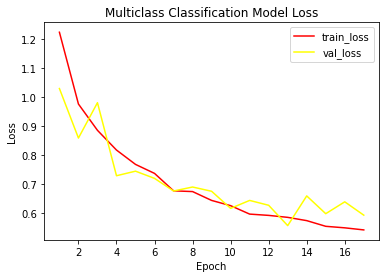

In [19]:
#Loss Graph - Multiclass Classification CNN-2D
plt.plot(df['loss'], color='red')
plt.plot(df['val_loss'], color='yellow')
plt.title('Multiclass Classification Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

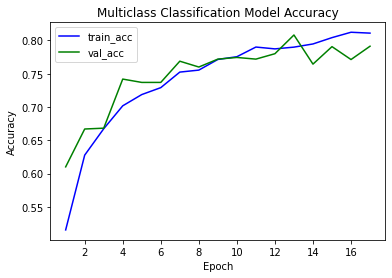

In [20]:
# Accuracy Graph - Multiclass Classification CNN-2D 
plt.plot(df['accuracy'], color='blue')
plt.plot(df['val_accuracy'], color='green')
plt.title('Multiclass Classification Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_acc', 'val_acc'])
plt.show()

## Prediction on New Data

Forest


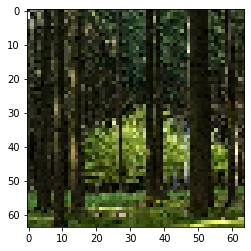

In [22]:
# Making predictions on new data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image

test_image = image.load_img('dataset/seg_pred/88.jpg', target_size = (64, 64))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
    
if result[0][0] == 1:
    prediction = 'Buildings'
    print(prediction)
elif result[0][1] == 1:
    prediction = 'Forest'
    print(prediction)
elif result[0][2] == 1:
    prediction = 'Glacier'
    print(prediction)
elif result[0][3] == 1:
    prediction = 'Mountain'
    print(prediction)
elif result[0][4] == 1:
    prediction = 'Sea'
    print(prediction)
else:
    prediction = 'Street'
    print(prediction)